In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array,ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import glob
import random
from tensorflow.keras.utils import to_categorical

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
!unzip gender_dataset_face.zip

Archive:  gender_dataset_face.zip
   creating: gender_dataset_face/
   creating: gender_dataset_face/man/
  inflating: gender_dataset_face/man/face_0.jpg  
  inflating: gender_dataset_face/man/face_1.jpg  
  inflating: gender_dataset_face/man/face_10.jpg  
  inflating: gender_dataset_face/man/face_1000.jpg  
  inflating: gender_dataset_face/man/face_1001.jpg  
  inflating: gender_dataset_face/man/face_1003.jpg  
  inflating: gender_dataset_face/man/face_1004.jpg  
  inflating: gender_dataset_face/man/face_1005.jpg  
  inflating: gender_dataset_face/man/face_1006.jpg  
  inflating: gender_dataset_face/man/face_1007.jpg  
  inflating: gender_dataset_face/man/face_101.jpg  
  inflating: gender_dataset_face/man/face_1010.jpg  
  inflating: gender_dataset_face/man/face_1011.jpg  
  inflating: gender_dataset_face/man/face_1012.jpg  
  inflating: gender_dataset_face/man/face_1014.jpg  
  inflating: gender_dataset_face/man/face_1016.jpg  
  inflating: gender_dataset_face/man/face_1018.jpg  
  

In [15]:
image_file=[f for f in glob.glob(r'gender_dataset_face'+"/**/*" ,recursive=True) if not os.path.isdir(f)]
image_file

['gender_dataset_face/man/face_951.jpg',
 'gender_dataset_face/man/face_1023.jpg',
 'gender_dataset_face/man/face_1141.jpg',
 'gender_dataset_face/man/face_323.jpg',
 'gender_dataset_face/man/face_960.jpg',
 'gender_dataset_face/man/face_615.jpg',
 'gender_dataset_face/man/face_709.jpg',
 'gender_dataset_face/man/face_1190.jpg',
 'gender_dataset_face/man/face_1321.jpg',
 'gender_dataset_face/man/face_361.jpg',
 'gender_dataset_face/man/face_787.jpg',
 'gender_dataset_face/man/face_1271.jpg',
 'gender_dataset_face/man/face_306.jpg',
 'gender_dataset_face/man/face_276.jpg',
 'gender_dataset_face/man/face_78.jpg',
 'gender_dataset_face/man/face_1160.jpg',
 'gender_dataset_face/man/face_71.jpg',
 'gender_dataset_face/man/face_1171.jpg',
 'gender_dataset_face/man/face_923.jpg',
 'gender_dataset_face/man/face_1159.jpg',
 'gender_dataset_face/man/face_215.jpg',
 'gender_dataset_face/man/face_273.jpg',
 'gender_dataset_face/man/face_146.jpg',
 'gender_dataset_face/man/face_159.jpg',
 'gender_d

In [16]:
random.shuffle(image_file)

In [17]:
image_file

['gender_dataset_face/man/face_783.jpg',
 'gender_dataset_face/man/face_34.jpg',
 'gender_dataset_face/woman/face_1342.jpg',
 'gender_dataset_face/man/face_13.jpg',
 'gender_dataset_face/man/face_52.jpg',
 'gender_dataset_face/man/face_1376.jpg',
 'gender_dataset_face/woman/face_858.jpg',
 'gender_dataset_face/woman/face_450.jpg',
 'gender_dataset_face/woman/face_760.jpg',
 'gender_dataset_face/woman/face_945.jpg',
 'gender_dataset_face/man/face_843.jpg',
 'gender_dataset_face/woman/face_307.jpg',
 'gender_dataset_face/man/face_1296.jpg',
 'gender_dataset_face/woman/face_688.jpg',
 'gender_dataset_face/man/face_684.jpg',
 'gender_dataset_face/man/face_327.jpg',
 'gender_dataset_face/man/face_1413.jpg',
 'gender_dataset_face/man/face_1076.jpg',
 'gender_dataset_face/woman/face_147.jpg',
 'gender_dataset_face/man/face_1021.jpg',
 'gender_dataset_face/man/face_175.jpg',
 'gender_dataset_face/man/face_952.jpg',
 'gender_dataset_face/woman/face_901.jpg',
 'gender_dataset_face/woman/face_142

In [18]:
data=[]
data_label=[]

In [19]:
for img in image_file:
  image=cv2.imread(img)
  image=cv2.resize(image,(96,96))
  image=img_to_array(image)
  data.append(image)
  label=img.split(os.path.sep)[-2]
  if label=='woman':
    label=1
  else:
    label=0
  data_label.append([label])

In [20]:
data=np.array(data,dtype='float')/255.0
data_label=np.array(data_label)

In [21]:
data

array([[[[0.07058824, 0.05882353, 0.07843137],
         [0.13333333, 0.12941176, 0.16470588],
         [0.16470588, 0.15686275, 0.18039216],
         ...,
         [0.01176471, 0.00392157, 0.03529412],
         [0.08627451, 0.04705882, 0.16078431],
         [0.24705882, 0.09803922, 0.54117647]],

        [[0.10196078, 0.09803922, 0.11764706],
         [0.14117647, 0.14901961, 0.18039216],
         [0.19607843, 0.20392157, 0.23529412],
         ...,
         [0.04705882, 0.03137255, 0.05098039],
         [0.01960784, 0.00784314, 0.04705882],
         [0.18431373, 0.11372549, 0.35294118]],

        [[0.0627451 , 0.05098039, 0.07058824],
         [0.09411765, 0.10196078, 0.1372549 ],
         [0.17647059, 0.18039216, 0.21960784],
         ...,
         [0.01568627, 0.00392157, 0.02352941],
         [0.01176471, 0.00784314, 0.01960784],
         [0.0745098 , 0.05882353, 0.15686275]],

        ...,

        [[0.80784314, 0.64705882, 0.27058824],
         [0.67843137, 0.56078431, 0.31764706]

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(data,data_label,test_size=0.2,random_state=42)

In [23]:
X_train

array([[[[0.77647059, 0.84313725, 0.81176471],
         [0.74117647, 0.81568627, 0.78823529],
         [0.73333333, 0.81568627, 0.80392157],
         ...,
         [0.63137255, 0.73333333, 0.65490196],
         [0.58431373, 0.6745098 , 0.61568627],
         [0.54509804, 0.63921569, 0.58431373]],

        [[0.82352941, 0.88235294, 0.85098039],
         [0.79607843, 0.86666667, 0.83137255],
         [0.72941176, 0.80784314, 0.78823529],
         ...,
         [0.59215686, 0.68627451, 0.61568627],
         [0.6       , 0.69411765, 0.63529412],
         [0.60784314, 0.70196078, 0.64705882]],

        [[0.85098039, 0.90980392, 0.87843137],
         [0.83529412, 0.90196078, 0.85098039],
         [0.8       , 0.87058824, 0.82745098],
         ...,
         [0.69019608, 0.74509804, 0.68235294],
         [0.67843137, 0.73333333, 0.67843137],
         [0.69803922, 0.74901961, 0.70588235]],

        ...,

        [[0.85098039, 0.88235294, 0.93333333],
         [0.85490196, 0.89411765, 0.9254902 ]

In [24]:
data_aug=ImageDataGenerator(rotation_range=25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [25]:
Y_train=to_categorical(Y_train,num_classes=2)
Y_test=to_categorical(Y_test,num_classes=2)

In [26]:
classes=2
batch_size = 64
epochs=100

In [27]:
model=Sequential([
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(96,96,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3)),
    layers.Dropout(0.25),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3)),
    layers.Dropout(0.25),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(classes,activation='softmax'),
])

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit_generator(data_aug.flow(X_train,Y_train,batch_size=batch_size),
          validation_data=(X_test,Y_test),
          steps_per_epoch=len(X_train)//batch_size,
          epochs=epochs,
          verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
28/28 [==============================] - 56s 2s/step - loss: 0.7780 - accuracy: 0.6732 - val_loss: 0.6789 - val_accuracy: 0.5714
Epoch 2/100
28/28 [==============================] - 54s 2s/step - loss: 0.4906 - accuracy: 0.8141 - val_loss: 0.6922 - val_accuracy: 0.4892
Epoch 3/100
28/28 [==============================] - 52s 2s/step - loss: 0.4032 - accuracy: 0.8417 - val_loss: 0.7350 - val_accuracy: 0.5476
Epoch 4/100
28/28 [==============================] - 53s 2s/step - loss: 0.3855 - accuracy: 0.8506 - val_loss: 0.7159 - val_accuracy: 0.5476
Epoch 5/100
28/28 [==============================] - 52s 2s/step - loss: 0.3526 - accuracy: 0.8714 - val_loss: 1.1304 - val_accuracy: 0.5476
Epoch 6/100
28/28 [==============================] - 52s 2s/step - loss: 0.2648 - accuracy: 0.8967 - val_loss: 0.6299 - val_accuracy: 0.5909
Epoch 7/100
28/28 [==============================] - 52s 2s/step - loss: 0.2557 - accuracy: 0.9062 - val_loss: 0.6345 - val_accuracy: 0.5844
Epoch 8/100
2

KeyboardInterrupt: ignored

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [30]:
import pickle
from tensorflow import keras
model.save('my_model')

In [32]:
model.save('model.h5')

In [33]:
hello=keras.models.load_model('my_model.h5')

In [67]:
predictions=hello.predict(X_test)
np.argmax(predictions[0])

0

In [37]:
pickle.dump(model,open('AgeAndGenderDetectionmodel.pkl','wb'))

In [38]:
predictions=model.predict(X_test)

In [39]:
np.argmax(predictions[2])

1

In [ ]:
pip install cvlib

In [41]:
import cvlib as cv
classes=['man','woman']

In [47]:
filename='woman.jpeg'
im = cv2.imread(filename)

In [48]:
faces,confidence=cv.detect_face(im)

In [70]:
ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"
print(ageProto)
print(ageModel)

age_deploy.prototxt
age_net.caffemodel


In [61]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']

In [69]:
ageNet=cv2.dnn.readNet(ageModel,ageProto)
ageNet

< cv2.dnn.Net 0x7f13bd606190>

(25-32)
woman


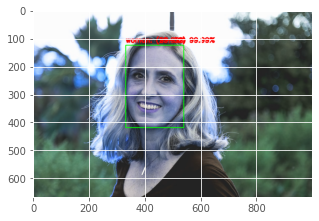

In [75]:
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    face_crop=np.copy(im[startY:endY,startX:endX])
    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue
    blob=cv2.dnn.blobFromImage(face_crop, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)
    conf = model.predict(face_crop)[0]
    ageNet.setInput(blob)
    agePred=ageNet.forward()
    age=ageList[agePred[0].argmax()]
    idx = np.argmax(conf)
    label = classes[idx]
    print(age)
    print(label)
    label = "{}: {} {:.2f}%".format(label,age, conf[idx] * 100)
    Y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(im, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (255,0,0), 2,cv2.LINE_AA)
plt.figure(figsize=(5, 5))
plt.imshow(im)